In [1]:
%matplotlib inline

import numpy as np
from sklearn import datasets, __version__
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
chd = datasets.fetch_california_housing()
df = pd.DataFrame(data=chd.data, columns=chd.feature_names)
df['Target'] = pd.Series(chd.target, index=df.index)
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


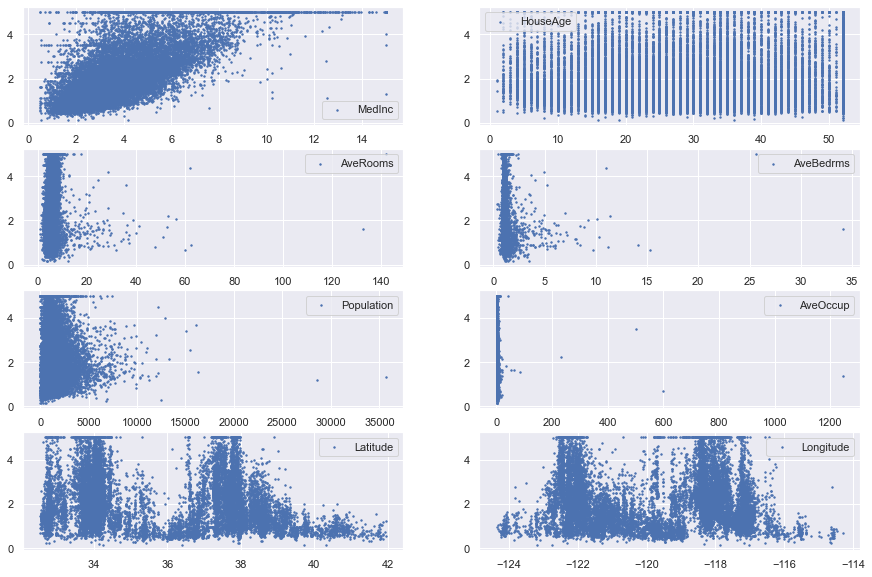

In [3]:
plt.figure(figsize=(15,10))
for i in range(8):
    plt.subplot(4,2,i+1)
    plt.scatter(chd.data[:,i], chd.target, s=2, label=chd.feature_names[i])
    plt.legend(loc='best')

In [4]:
test_size = 5000
single_attribute = 'MedInc'

X_train_all, X_test_all, y_train, y_test = train_test_split(
    chd.data, chd.target, test_size=test_size, shuffle=True)

attribute_index = chd.feature_names.index(single_attribute)
X_train_single = X_train_all[:, attribute_index].reshape(-1, 1)
X_test_single = X_test_all[:, attribute_index].reshape(-1, 1)
     
print()
print('California housing data: train:',len(X_train_all),'test:',len(X_test_all))
print()
print('X_train_all:', X_train_all.shape)
print('X_train_single:', X_train_single.shape)
print('y_train:', y_train.shape)
print()
print('X_test_all', X_test_all.shape)
print('X_test_single', X_test_single.shape)
print('y_test', y_test.shape)


California housing data: train: 15640 test: 5000

X_train_all: (15640, 8)
X_train_single: (15640, 1)
y_train: (15640,)

X_test_all (5000, 8)
X_test_single (5000, 1)
y_test (5000,)


In [5]:
only_single_attribute = True

if only_single_attribute:
    X_train = X_train_single
    X_test = X_test_single
else:
    X_train = X_train_all
    X_test = X_test_all

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print('X_train: shape:', X_train.shape, 'mean:', X_train.mean(axis=0), 'std:', X_train.std(axis=0))
print('X_test: shape:', X_test.shape, 'mean:', X_test.mean(axis=0), 'std:', X_test.std(axis=0))

X_train: shape: (15640, 1) mean: [1.55033701e-16] std: [1.]
X_test: shape: (5000, 1) mean: [-0.02235455] std: [0.96181659]


In [6]:
%%time

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print('coefficients:', lin_reg.coef_)
print('intercept:', lin_reg.intercept_)

coefficients: [0.79286169]
intercept: 2.0734858331202046
Wall time: 6.98 ms


In [7]:
lin_reg.score(X_train, y_train)

0.4703003923286134

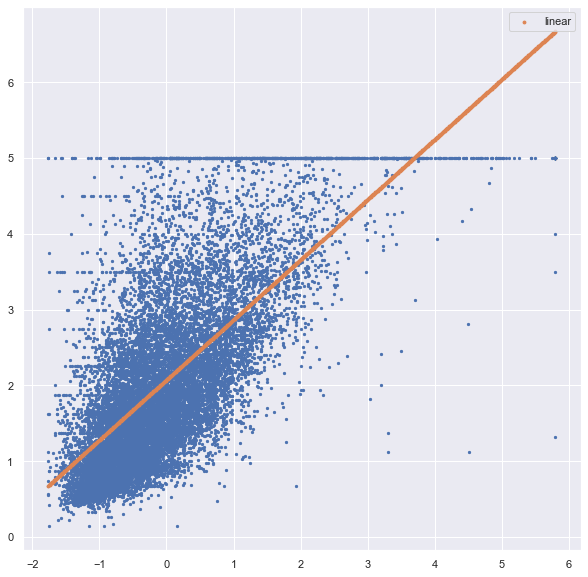

In [8]:
if X_train.shape[1] == 1:
    plt.figure(figsize=(10, 10))
    plt.scatter(X_train, y_train, s=5)
    reg_x = np.arange(np.min(X_train), np.max(X_train), 0.01).reshape(-1, 1)
    plt.scatter(reg_x, lin_reg.predict(reg_x), s=8, label='linear')
    plt.legend(loc='best');

In [9]:
%%time

predictions = lin_reg.predict(X_test)
print("Mean squared error: %.3f"
      % mean_squared_error(y_test, predictions))

Mean squared error: 0.680
Wall time: 6.18 ms


In [10]:
lin_reg.score(X_test,y_test)

0.4831077772000293

In [13]:
lin_reg.score(X_train,y_train)

0.4703003923286134